In [1]:
# Устанавливаем некоторые модули

import os
from google.colab import drive
drive.mount('/content/drive')
import re
from bs4 import BeautifulSoup as bs
import codecs

Mounted at /content/drive


In [2]:
# Меняем директорию

os.chdir('/content/drive/MyDrive/Для проекта')
print(os.listdir())

['ЗАЧАРОВАННЫЕ_ как проходили СЪЁМКИ _ _СМЕРТЬ_ ПРЮ _ АКТРИСЫ не ладили_ _ ФЕМИНИЗМ в СЕРИАЛЕ.txt', 'Две Голливудские КАТАСТРОФЫ ХУЖЕ КАПИТАНШИ МАРВЕЛ.txt', 'Antonov1.html', 'Antonov2.html', 'Antonov3.html', 'Johnny1.html', 'Johnny2.html', 'Johnny3.html', 'Johnny4.html', 'Johnny5.html', 'Kultas1.html', 'Kultas2.html', 'Выбираемся из нищеты_ схема Белоусова.txt']


In [3]:
# Делаем списки со страничками из Телеграм и с текстами скриптов видео

data1 = []
for i in os.listdir():
    if '.html' in i:
      data1.append(i)
data2 =[i for i in  os.listdir() if i not in data1]

texts_video = []
for i in data2:
  with open (i, "r") as f:
    text = f.read()
  texts_video.append(text)
print(data1)
print(data2)

['Antonov1.html', 'Antonov2.html', 'Antonov3.html', 'Johnny1.html', 'Johnny2.html', 'Johnny3.html', 'Johnny4.html', 'Johnny5.html', 'Kultas1.html', 'Kultas2.html']
['ЗАЧАРОВАННЫЕ_ как проходили СЪЁМКИ _ _СМЕРТЬ_ ПРЮ _ АКТРИСЫ не ладили_ _ ФЕМИНИЗМ в СЕРИАЛЕ.txt', 'Две Голливудские КАТАСТРОФЫ ХУЖЕ КАПИТАНШИ МАРВЕЛ.txt', 'Выбираемся из нищеты_ схема Белоусова.txt']


In [4]:
# Функция, чтобы собрать из html только блок с текстом

def message(text):
  f = codecs.open(text, 'r', 'utf-8') # читаем код html из файла
  html = f.read() # записываем его в переменную
  soup = bs(html, "lxml")
  message = []
  for i in soup.find_all('div', {'class' : "text"}):
    message.append(i.text.strip())
  message_list = []
  for i in soup.find_all('div', {'class' : "body"}):
    try:
      t = re.findall(r'<div class="text">(\n.*\n).*</div>', str(i))
      l = []
      l.append(t[0].strip())
      if len(l) > 0 and l not in message_list:
       message_list.append(l)
    except:
      pass
  soup.find_all('div', {'class' : "body"})
  return message_list

In [5]:
# Убираем списки списков

def lst_merge(lstlst):
  all=[]
  for lst in lstlst:
    for i in lst:
        all += i
    return all

In [6]:
# Оставляем только текст без всяких html помет, ссылок и др

def normalize(lst):
  msg = "^".join(lst)
  msg = msg.replace("<strong>", " ").replace("</strong>", " ").replace("<br/>", " ").replace("<em>", " ").replace("</em>", " ").replace("--&gt", " ")
  msg = re.sub(r"<a .*?href=\".*?\">.*?<\/a>", "", msg)
  lst = msg.split("^")
  lst = [comment for comment in lst if comment.strip()]
  return lst

In [7]:
# Ищем посты, где есть кодовые переключения

def switch(lst):
  switchcode = []
  for string in lst:
    if any(char.isalpha() and char.isascii() for char in string):
        switchcode.append(string)
  return switchcode

In [8]:
# Выполняем все функции
telegram = []
for i in data1:
  txt = message(i)
  telegram.append(txt)

In [44]:
print(len(telegram), telegram[0][0][:100]) # Проверяем, что все сработало

10 ['<strong>Крипторынок то и дело оживает. </strong><br/><br/>Тут и там слышится довольное урчание зафиксировавших 10% прибыли фейсбучных трейдеров - косарь баксов-то не лишний! - а значит, пришла пора поговорить о часто вами слышимом, но не всегда правильно понимаемом термине - <strong>маркетмейкинг</strong>. А также понять, чем он отличается от воштрейдинга и прямого манипулирования ценой.<br/><br/><a href="" onclick=\'return ShowHashtag("финансы")\'>#финансы</a> <a href="" onclick=\'return ShowHashtag("трейдинг")\'>#трейдинг</a><br/><br/><a href="https://telegra.ph/Kriptorynok-to-i-delo-ozhivaet-04-20">https://telegra.ph/Kriptorynok-to-i-delo-ozhivaet-04-20</a>']


In [10]:
Antonov_tg = lst_merge(telegram[0:3])
Johnny_tg = lst_merge(telegram[3:8])
Kultas_tg = lst_merge(telegram[8:])

In [11]:
all_tg_Antonov = normalize(Antonov_tg)
all_tg_Johnny = normalize(Johnny_tg)
all_tg_Kultas = normalize(Kultas_tg)

In [ ]:
# Остаются текстики

print(all_tg_Antonov[:2], all_tg_Johnny[:2], all_tg_Kultas[:2], sep = "\n")

In [21]:
# Смотрим количество токенов
print(len(" ".join(all_tg_Antonov).split()), len(" ".join(all_tg_Johnny).split()), len(" ".join(all_tg_Kultas).split()), len(" ".join(texts_video[0]).split()), len(" ".join(texts_video[1]).split()), len(" ".join(texts_video[2]).split()))

127001 3222 36769 39871 22356 41405


In [ ]:
# Их можно занести в табличку

import pandas as pd
A = pd.DataFrame(all_tg_Antonov)
A.to_excel("Antonov.xlsx", encoding='utf-8')
J = pd.DataFrame(all_tg_Johnny)
J.to_excel("Johnny.xlsx", encoding='utf-8')
K = pd.DataFrame(Kultas_tg)
K.to_excel("Kultas.xlsx", encoding='utf-8')


In [13]:
# Переменные хранят только посты с переключениями

switch_A = switch(all_tg_Antonov)
switch_J = switch(all_tg_Johnny)
switch_K = switch(all_tg_Kultas)

In [ ]:
# Еще подгружаем библиотеки

!python -m spacy download ru_core_news_sm
import spacy
from spacy import displacy
from IPython.core.display import display, HTML
from spacy.lang.ru import Russian

In [15]:
# Убираем английские названия в списках

def no_eng_ents(lst):
  nlp = spacy.load("ru_core_news_sm")
  txt = "^".join(lst)
  doc = nlp(txt)
  ents=[]
  for ent in doc.ents:
    ents.append((ent.text))
  ents_en = []
  for string in ents:
    if any(char.isalpha() and char.isascii() for char in string):
      ents_en.append(string)
  for string in ents_en:
    while string in txt:
      txt = txt.replace(string,"имя")
  clean_lst = txt.split("^")
  return clean_lst

In [16]:
switch_A = no_eng_ents(switch_A)
switch_J = no_eng_ents(switch_J)
switch_K = no_eng_ents(switch_K)

In [22]:
# Убираем английские названия в текстах

def no_eng_ents_txt(txt):
  nlp = spacy.load("ru_core_news_sm")
  doc = nlp(txt)
  ents=[]
  for ent in doc.ents:
    ents.append((ent.text))
  ents_en = []
  for string in ents:
    if any(char.isalpha() and char.isascii() for char in string):
      ents_en.append(string)
  for string in ents_en:
    while string in txt:
      txt = txt.replace(string,"имя")
  return txt

In [23]:
Antonov_vid = no_eng_ents_txt(texts_video[2])
Johnny_vid = no_eng_ents_txt(texts_video[0])
Kultas_vid = no_eng_ents_txt(texts_video[1])

In [24]:
# Убираем пунктуацию и цифры

import string
def normalize(text):
  normalized = ''.join([i for i in text if not i.isdigit() and i != "—"])
  normalized = normalized.translate(str.maketrans('', '', string.punctuation))
  return normalized

In [25]:
# Все еще чистим и собираем в список все устные и письменные тексты

A_tg = normalize(" ".join(switch_A))
J_tg = normalize(" ".join(switch_J))
K_tg = normalize(" ".join(switch_K))
Antonov_vid = normalize(Antonov_vid)
Johnny_vid = normalize(Johnny_vid)
Kultas_vid = normalize(Kultas_vid)

all_texts = [A_tg, J_tg, K_tg, Antonov_vid, Johnny_vid, Kultas_vid]

In [42]:
print(A_tg[:100])

 имя   Вроде надо чтото запостить какието фотки Но запостить просто фотки без мыслей  и получатся оч


In [27]:
# К сожалению, нашлись далеко не все названия и приходится дочищать вручную :(

def what_remain(txt):
  eng = []
  a = txt.split()
  for word in a:
    if word.isascii():
      eng.append(word)
  return eng

In [28]:
remains = []
for string in all_texts:
  e = what_remain(string)
  remains.append(e)

In [ ]:
remains = [j for i in remains for j in i]


In [ ]:
a = remains
import pandas as pd
A = pd.DataFrame(a)
A.to_excel("eng.xlsx", encoding='utf-8')

In [30]:
with open ("eng ent.csv", "r") as f:
    text = f.read()
eng_names = text.split()

In [31]:
def superclean(txt):
  a = txt.split()
  for word in a:
    if word in eng_names:
      while word in txt:
        txt = txt.replace(word,"имя")
  return txt

In [32]:
# Вроде все дочистили

for txt in range(len(all_texts)):
  all_texts[txt] = superclean(all_texts[txt])

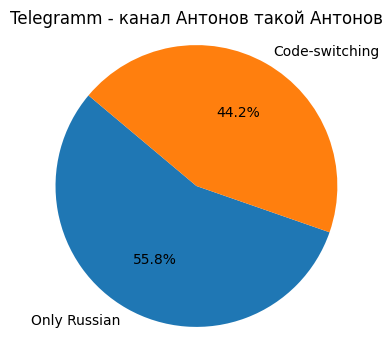

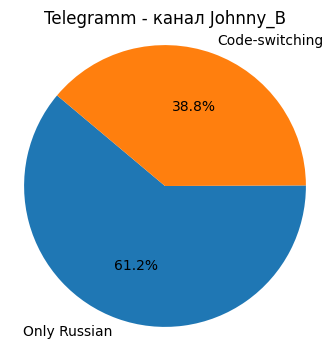

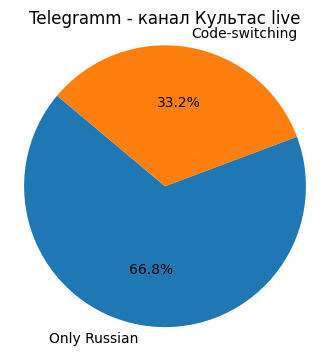

In [33]:
# Визуализируем

import matplotlib.pyplot as plt

labels = ["Only Russian", 'Code-switching']
sizes = [len(all_tg_Antonov)-len(switch_A), len(switch_A)]

plt.figure(figsize=(4, 4))
plt.title('Telegramm - канал Антонов такой Антонов')
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Отображение диаграммы в виде круга
plt.show()

labels = ["Only Russian", 'Code-switching']
sizes = [len(all_tg_Johnny)-len(switch_J), len(switch_J)]

plt.figure(figsize=(4, 4))
plt.title('Telegramm - канал Johnny_B')
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Отображение диаграммы в виде круга
plt.show()

labels = ["Only Russian", 'Code-switching']
sizes = [len(all_tg_Kultas)-len(switch_K), len(switch_K)]

plt.figure(figsize=(4, 4))
plt.title('Telegramm - канал Культас live')
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Отображение диаграммы в виде круга
plt.show()

In [34]:
# Посчитаем процент по токенам, сколько русских и сколько английских

for i, value in enumerate(all_texts):
  lst = value.split()
  for word in range(len(lst)):
    if lst[word][0].isalpha() and lst[word][0].isascii():
      lst[word] = "English word"
  print(lst.count("English word"))
  a = " ".join(lst)
  all_texts[i] = a # в списке текстики, где все английские слова заменены на English word


694
176
75
20
22
4


In [35]:
eng_num = {"A_tg": 694, "J_tg": 176, "K_tg":75, "A_vid":20, "J_vid": 22, "K_vid": 4  }

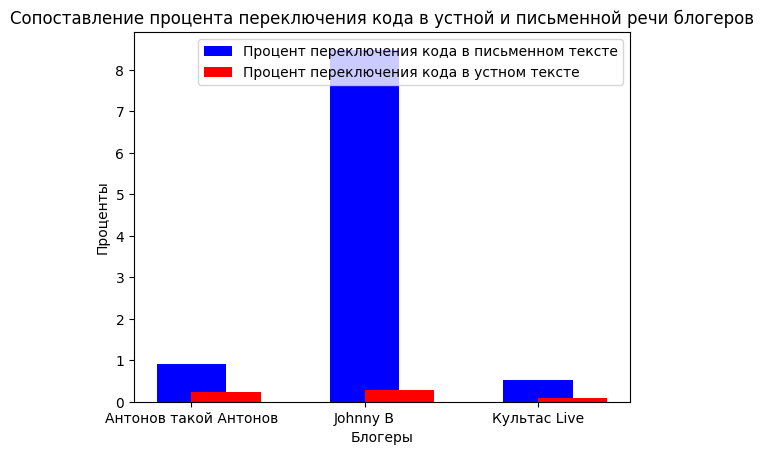

In [38]:
# Данные для сравнения
categories = ['Антонов такой Антонов', 'Johnny B', 'Культас Live']
values_1 = [eng_num.get("A_tg")/len(all_texts[0].split())*100, eng_num.get("J_tg")/len(all_texts[1].split())*100, eng_num.get("K_tg")/len(all_texts[2].split())*100]
values_2 = [eng_num.get("A_vid")/len(all_texts[3].split())*100, eng_num.get("J_vid")/len(all_texts[4].split())*100, eng_num.get("K_vid")/len(all_texts[5].split())*100]

plt.bar(categories, values_1, color='b', width=0.4, label='Процент переключения кода в письменном тексте')
plt.bar(categories, values_2, color='r', width=0.4, label='Процент переключения кода в устном тексте', align='edge')

plt.xlabel('Блогеры')
plt.ylabel('Проценты')
plt.title('Сопоставление процента переключения кода в устной и письменной речи блогеров')
plt.legend()
plt.show()

In [40]:
# Смотрим, с какой частотой появляются английские слова. Если слово англ, то записываем 1, если русское, то 0

freq = []
for txt in all_texts:
  a = txt.split()
  for i, value in enumerate(a):
    if value.isascii():
      a[i] = 1
    else:
      a[i] = 0
  freq.append(a)


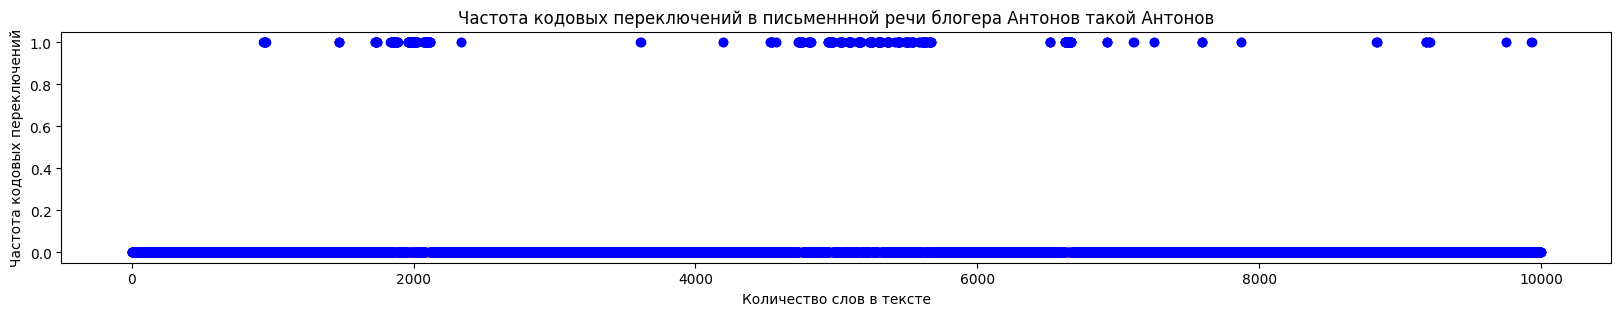

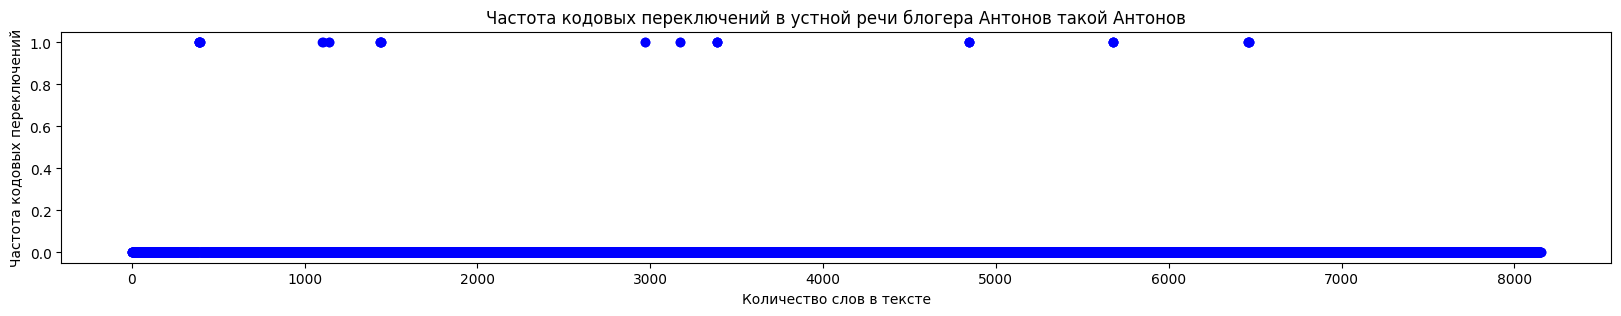

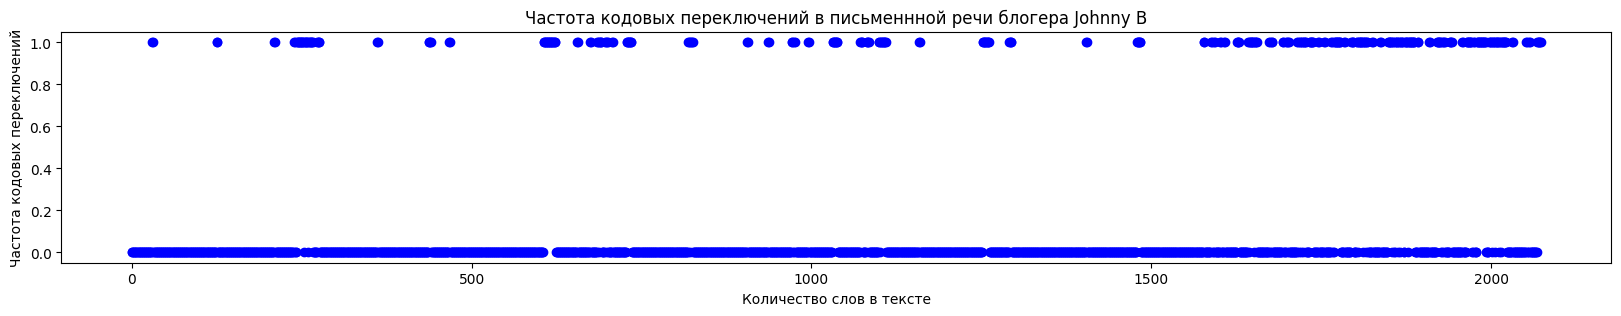

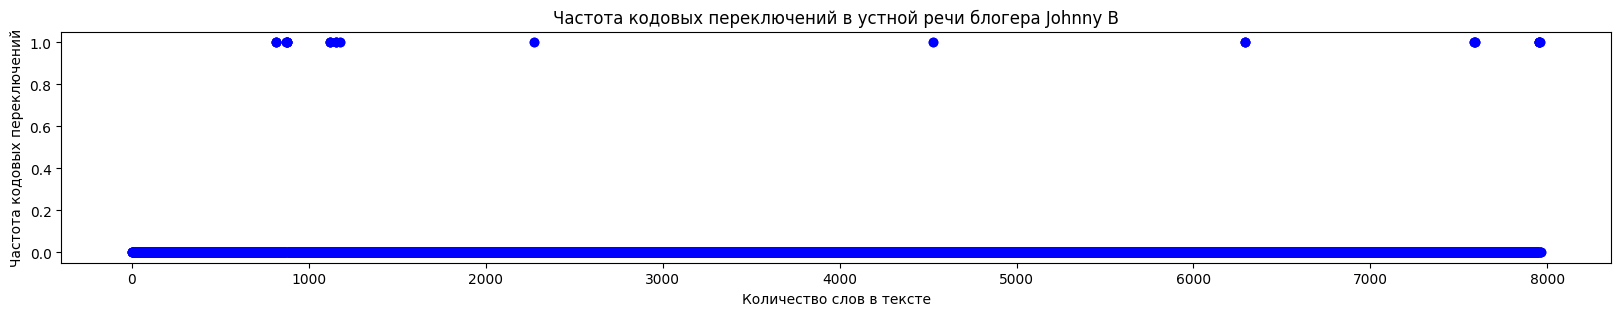

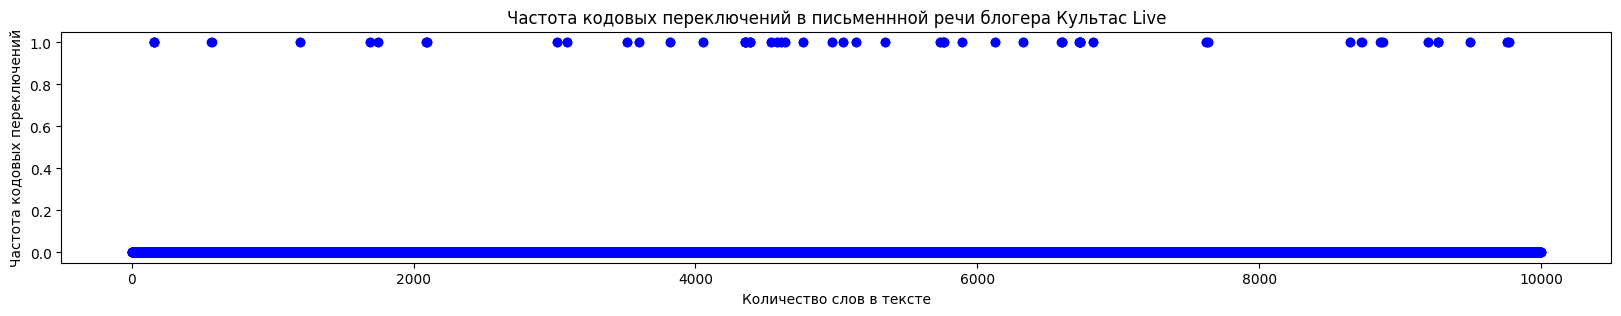

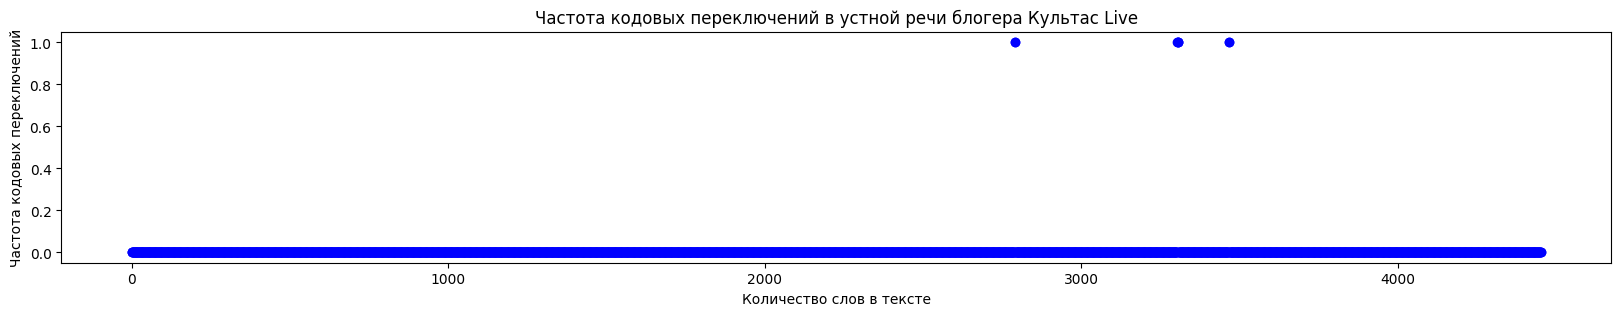

In [41]:

plt.figure(figsize=(20, 3))
plt.scatter(range(len(freq[0][:10000])),freq[0][:10000], marker='o', color='b')
plt.xlabel("Количество слов в тексте")
plt.ylabel("Частота кодовых переключений")
plt.title("Частота кодовых переключений в письменнной речи блогера Антонов такой Антонов")
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(range(len(freq[3][:10000])),freq[3][:10000], marker='o', color='b')
plt.xlabel("Количество слов в тексте")
plt.ylabel("Частота кодовых переключений")
plt.title("Частота кодовых переключений в устной речи блогера Антонов такой Антонов")
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(range(len(freq[1][:10000])),freq[1][:10000], marker='o', color='b')
plt.xlabel("Количество слов в тексте")
plt.ylabel("Частота кодовых переключений")
plt.title("Частота кодовых переключений в письменнной речи блогера Johnny B")
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(range(len(freq[4][:10000])),freq[4][:10000], marker='o', color='b')
plt.xlabel("Количество слов в тексте")
plt.ylabel("Частота кодовых переключений")
plt.title("Частота кодовых переключений в устной речи блогера Johnny B")
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(range(len(freq[2][:10000])),freq[2][:10000], marker='o', color='b')
plt.xlabel("Количество слов в тексте")
plt.ylabel("Частота кодовых переключений")
plt.title("Частота кодовых переключений в письменнной речи блогера Культас Live")
plt.show()

plt.figure(figsize=(20, 3))
plt.scatter(range(len(freq[5][:10000])),freq[5][:10000], marker='o', color='b')
plt.xlabel("Количество слов в тексте")
plt.ylabel("Частота кодовых переключений")
plt.title("Частота кодовых переключений в устной речи блогера Культас Live")
plt.show()